# Análisis de supervivencia

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1698748743656.png"
style = "width:400px;">

El análisis de supervivencia (también conocido como **análisis de tiempo hasta el evento** o **análisis de fiabilidad** en ingeniería) se encarga de analizar el efecto de diferentes factores de riesgo y utilizarlos para predecir la duración del tiempo entre un evento ("`nacimiento`") y otro ("`muerte`").

En un sentido general, se puede considerar como una forma de modelar cualquier cosa con una duración finita: retención, abandono, finalización, etc. La culminación de esta duración puede tener una connotación "buena" o "mala" (o "neutral"), dependiendo de la situación. Sin embargo, la terminología original perdura, y comúnmente se le sigue llamando análisis de supervivencia, utilizando las siguientes definiciones:

* nacimiento: el evento que marca el inicio del período de observación
* muerte: el evento de interés que marca el final del período de observación para un individuo

Ejemplo | Evento de Nacimiento | Evento de Muerte
---|---|---
Abandono de clientes | el cliente se suscribe a un servicio | el cliente abandona el servicio
Retención de empleados | se contrata al empleado | el empleado renuncia
Fiabilidad de una pieza en ingeniería | se pone en uso la pieza | la pieza falla
Finalización de un programa | el estudiante comienza el programa de doctorado | el estudiante obtiene el doctorado
Tiempo de respuesta | se hace una llamada al 911 | llega la policía
Paciente enfermo | el paciente recibe tratamiento | el paciente fallece

#### Entonces... si todo lo que estamos prediciendo acá es la duración entre dos eventos, ¿por qué no podemos regresión lineal común y corriente?
Bueno... si tenés todos los datos, podrías. En algunas situaciones podría servir...

#### Pero, ¿tenés todos los datos?

No siempre tenemos la oportunidad de observar el evento "muerte". El tiempo actual u otros factores (malos registros!) interfieren en nuestra capacidad para observar el tiempo del evento de interés. A estas observaciones se les llama _censuradas_.

Adicionalmente, la ocurrencia o no ocurrencia de un evento es binaria; por lo tanto, aunque el tiempo es continuo, el evento en sí es en cierto modo similar a un evento binario en la regresión logística.

---

## Censura en los Datos

Supongamos que se desarrolla un nuevo tratamiento para el cáncer. Los investigadores seleccionan a 50 individuos para el estudio, quienes se someten al tratamiento y participan en la observación posterior al mismo.

Ejemplo | Evento de Nacimiento | Evento de Muerte
---|---|---
Supervivencia al cáncer | El participante comienza el ensayo | El participante fallece debido al cáncer o complicaciones relacionadas

Durante el estudio:
1. Algunos participantes fallecen durante el curso del estudio, lo que dispara su evento de muerte.
2. Algunos participantes abandonan o los investigadores pierden contacto con ellos. Los investigadores tienen sus datos hasta el momento en que abandonaron, pero no tienen un evento de muerte que registrar.
3. Algunos participantes siguen vivos al final del período de observación. Así que, de nuevo, los investigadores tienen sus datos hasta cierto punto, pero no hay un evento de muerte que registrar.

Solo conocemos el intervalo entre el evento de "nacimiento" y el de "muerte" para los participantes en la categoría 1. Para todos los demás, solo sabemos que sobrevivieron _hasta_ cierto punto.

### Manejo de Datos Censurados

Sin el análisis de supervivencia, podríamos manejar los datos censurados de dos maneras:
* Podríamos simplemente tratar el final del período de observación como el momento del evento de muerte.
* (Aún peor) Podríamos descartar los datos censurados con el razonamiento de que tenemos "datos incompletos" para esas observaciones.

Pero... ambas opciones subestimarían las tasas de supervivencia para el propósito del estudio. **Sabemos** que todos esos individuos "sobrevivieron" al evento de "muerte" más allá de un cierto punto.

Afortunadamente, en la década de 1980 un par de genios, entre ellos David Cox realizaron el trabajo matemático difícil para hacer posible incorporar características adicionales como medidas predictivas para las probabilidades de tiempo de supervivencia.

---



## Función de Riesgo / Hazard Function

La función de riesgo representa la probabilidad **instantánea** de fallo. Con datos del mundo real suele adoptar tres formas típicas.

![Diferentes funciones de riesgo](https://upload.wikimedia.org/wikipedia/commons/2/25/Compsyseng17_04.jpg)

Las tasas de fallo crecientes y decrecientes son bastante intuitivas.

La forma de "bañera" o "embudo" es quizás la más sorprendente, pero en realidad modela muchas situaciones del mundo real. Por ejemplo, la esperanza de vida en general es menor en los extremos etareos: Muchas enfermedades/traumas amenazan principalmente a niños y ancianos, y las personas de mediana edad suelen ser más robustas a ellas. 

El "embudo" también es adecuada para muchas situaciones no humanas: a menudo, en el análisis de fiabilidad, las partes mecánicas fallan temprano (debido a defectos de fabricación) o sobreviven y tienen una vida útil relativamente larga hasta que eventualmente fallan debido al envejecimiento y al uso.

## Función de Supervivencia (también conocida como función de fiabilidad)

![4 funciones de supervivencia](https://upload.wikimedia.org/wikipedia/commons/e/e0/Four_survival_functions.svg)

Si analizamos el último gráfico de abajo a la derecha, vemos que para una función de supervivencia dada en cualquier escenario, siempre la probabilidad es 1. Es decir, todos los sujetos al comienzo del seguimiento están vivos, con probabilidad del 100%. A medida que pasa el tiempo, disminuye, para converger eventualmente en 0.

En general, cuando hacemos análisis de supervivencia, buscamos modelar la probabilidad de que el objeto en estudio sobreviva más allá de un tiempo dado (el tiempo de segumiento!). 

En resumen: la función de supervivencia es la función que te arroja la probabilidad de que el objeto de estudio sobreviva X tiempo.

Para más información técnica al respecto, pueden consultar [aquí](https://en.wikipedia.org/wiki/Survival_function)

## Formas de modelar el análisis de supervivencia:

- Estimador de Kaplan-Meier
- Estimador de Nelson-Aalen
- Riesgos Proporcionales (Modelo de Cox, integra covariables)
- Modelo de Riesgos Aditivos (Modelo Aditivo de Aalen, cuando las covariables son dependientes del tiempo)

Componentes clave necesarios para estos modelos: duración y si la observación está censurada.

No vamos a ahondar en el razonamiento matemático por detrás, pero Wikipedia en inglés es un buen [starting point](https://en.wikipedia.org/wiki/Survival_analysis) para los más interesados.

### Definiciones básicas:
* `Evento`: Muerte, aparición de enfermedad, recurrencia de enfermedad, recuperación u otra experiencia de interés.
* `Tiempo`: El tiempo desde el comienzo de un período de observación (como una cirugía o el inicio de un tratamiento) hasta (i) un evento, o (ii) el fin del estudio, o (iii) pérdida de contacto o retiro del estudio.
* `Censura / Observación censurada`: La censura ocurre cuando tenemos alguna información sobre el tiempo de supervivencia de un individuo, pero no conocemos el tiempo de supervivencia exactamente. El sujeto es censurado en el sentido de que no se observa ni se sabe nada sobre ese sujeto después del tiempo de censura. Un sujeto censurado puede o no tener un evento después del fin del tiempo de observación.
* `Función de supervivencia S(t)`: La probabilidad de que un sujeto sobreviva más tiempo que t.


## Biblioteca `lifelines`
Es una libreria muy práctica para el análisis de supervivencia en Python. Pueden revisar la documentación [aquí](https://lifelines.readthedocs.io/en/latest/) o en este artículo de [Medium](https://medium.com/analytics-vidhya/survival-analysis-using-lifelines-in-python-bf5eb0435dec).

Es muy sencilla de usar ya que es compatible con `Pandas`. Nuestro único requisito es que el dataframe tenga:
* una duración de tiempo para la observación
* una columna binaria en relación a la censura (`1` si se observó el evento de muerte, `0` si no se observó el evento de muerte)

En ocasiones, estos datos están pero requieren un preprocesado previo.

# Ejemplo 1: Leucemia

`lifelines` viene con algunos conjuntos de datos para que comencemos a explorar la libreria.

La mayoría de los conjuntos de datos son versiones depuradas de conjuntos reales. Vamso a utilizar su conjunto de datos de Leucemia, que compara dos tratamientos diferentes y se ha obtenido de [http://web1.sph.emory.edu/dkleinb/allDatasets/surv2datasets/anderson.dat](http://web1.sph.emory.edu/dkleinb/allDatasets/surv2datasets/anderson.dat).

Recuerden instalar la libreria en el caso de utilizarla por primera vez:

In [ ]:
#!pip install lifelines

Presten especial atención a como está armado el dataframe de Pandas.

In [13]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

leukemia = pd.read_csv('./databases/leukemia.csv')

leukemia.head()

,t,status,sex,logWBC,Rx
0,35,0,1,1.45,0
1,34,0,1,1.47,0
2,32,0,1,2.20,0
3,32,0,1,2.53,0
4,25,0,1,1.78,0


| Variable | Descripción                                                                                                                                                                     |
|----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| t        | Representa el tiempo de supervivencia de los pacientes, medido en meses. Indica cuánto tiempo ha sobrevivido un paciente desde el diagnóstico o inicio del estudio. |
| status   | Indicador binario que representa si el paciente tuvo el evento (muerte) o fue censurado (pérdida de seguimiento, etc).                                                               |
| sex      | Género del paciente.                                                                                        |
| logWBC   | Logaritmo del recuento de Glóbulos Blancos. Un alto recuento puede indicar leucemia. Tomar el logaritmo puede ayudar a linealizar relaciones en los datos.             |
| Rx       | Variable binaria para indicar si el paciente recibió o no tratamiento con radioterapia.


In [23]:
leukemia['Rx'].unique()

array([0, 1])

In [14]:
leukemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       42 non-null     int64  
 1   status  42 non-null     int64  
 2   sex     42 non-null     int64  
 3   logWBC  42 non-null     float64
 4   Rx      42 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.8 KB


In [15]:
leukemia.describe()

,t,status,sex,logWBC,Rx
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,12.880952,0.714286,0.476190,2.930238,0.500000
std,9.347498,0.457230,0.505487,0.917522,0.506061
min,1.000000,0.000000,0.000000,1.450000,0.000000
25%,6.000000,0.000000,0.000000,2.302500,0.000000
50%,10.500000,1.000000,0.000000,2.800000,0.500000
75%,18.500000,1.000000,1.000000,3.490000,1.000000
max,35.000000,1.000000,1.000000,5.000000,1.000000


/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(


[]

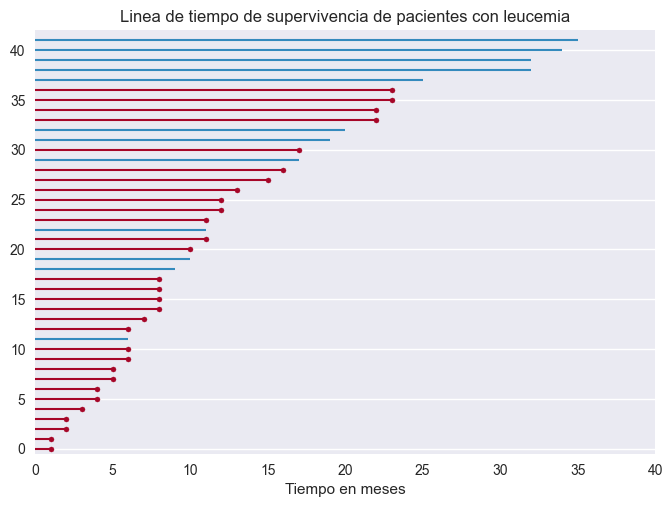

In [16]:
# Aca simplemente nos quedamos con la duración y los eventos en formato de Numpy array (por eso el .values) 
# Es el mismo formato que soporta Scikit-learn cuando creamos X e y
durations = leukemia['t'].values
events = leukemia['status'].values

# Luego utilizamos estos dos objetos como argumentos en lifelines.plotting.plot_lifetimes
ax = lifelines.plotting.plot_lifetimes(durations=durations,
                                    event_observed=events)

# Graficamos
ax.set_xlim(0, 40)
ax.grid(axis='x')
ax.set_xlabel("Tiempo en meses")
ax.set_title("Linea de tiempo de supervivencia de pacientes con leucemia")
plt.plot()

### Estimación de supervivencia Kaplan-Meier:

Estima la probabilidad de supervivencia a partir de los tiempos de supervivencia observados. Resulta en una función escalonada que cambia de valor solo en el momento de cada evento, y se pueden calcular intervalos de confianza para las probabilidades de supervivencia.

La **curva de supervivencia KM**, nos aporta información visual de la probabilidad de supervivencia de KM en el tiempo. Se puede utilizar para estimar medidas como el tiempo medio de supervivencia.

`NO` puede tener en cuenta factores de riesgo y `NO` es una regresión. Es *no paramétrico* (no involucra parámetros).

Sin embargo, es una buena manera de visualizar un conjunto de datos de supervivencia y `puede ser útil para comparar los efectos de una única variable categórica`.

Mediana de sobrevida: 12.0 meses luego del tratamiento


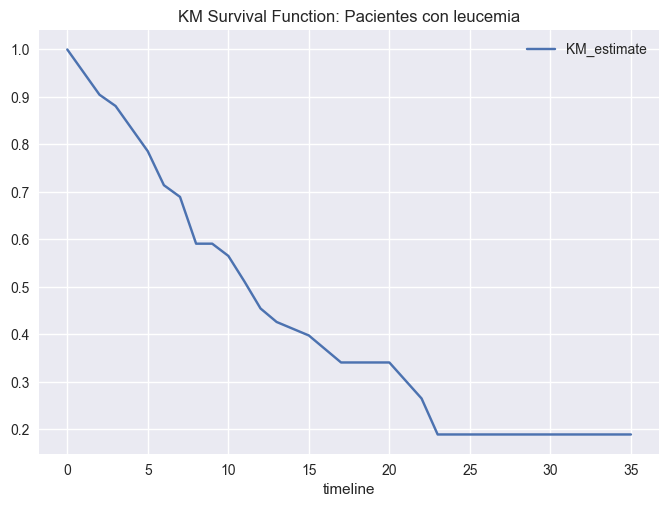

In [17]:
# Llamamos a la clase de KaplanMeierFitter
kmf = lifelines.KaplanMeierFitter()

# Hacemos fit con durations y events
kmf.fit(durations, events)

# Graficamos
kmf.survival_function_.plot()
plt.title('KM Survival Function: Pacientes con leucemia');
print(f'Mediana de sobrevida: {kmf.median_survival_time_} meses luego del tratamiento')

Por ejemplo aca podemos comparar la mediana de sobrevida de pacientes con Leucemia que recibieron tratamiento con radioterapia vs sin radioterapia. 

Mediana de sobrevida con Trtamiento 1: 8.0 meses
Mediana de sobrevida con Trtamiento 0: 23.0 meses


Text(0.5, 1.0, 'Sobrevida en pacientes con leucemia')

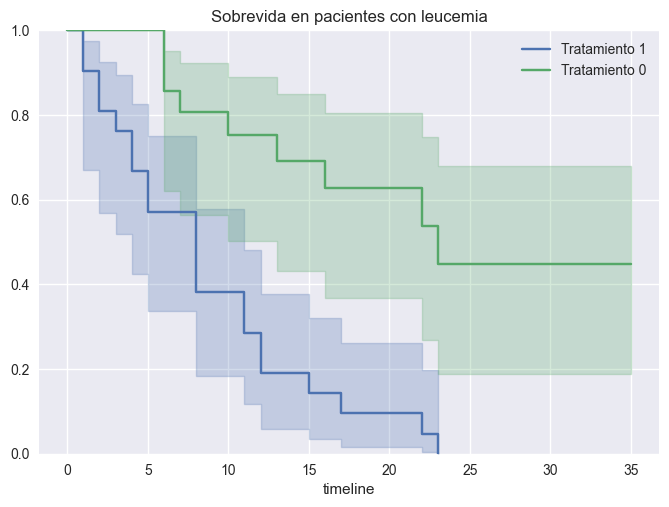

In [19]:
# Simplemente creamos un objeto para ir "cargando" nuestros graficos superpuestos
ax = plt.subplot(111)

# Fundamental usar mascaras de Pandas
# Aca filtramos solo las filas de pacientes que recibieron radioterapia
treatment = (leukemia["Rx"] == 1)

# Aca hacemos la curva de KM solo para RX == 1
kmf.fit(durations=durations[treatment], #Aca se pone la mascara para durations
        event_observed=events[treatment], #Aca se pone la mascara para events
        label="Tratamiento 1")

# Cargamos como gráfico nuestra primera curva
kmf.plot(ax=ax)
print(f'Mediana de sobrevida con Trtamiento 1: {kmf.median_survival_time_} meses')

# Aca hacemos la curva de KM solo para RX == 0
kmf.fit(durations=durations[~treatment], # Miren como usamos el ~ para invertir el valor de nuestra máscara!
        event_observed=events[~treatment], # Idem
        label="Tratamiento 0")

# Cargamos como gráfico nuestra segunda curva
kmf.plot(ax=ax)
print(f'Mediana de sobrevida con Trtamiento 0: {kmf.median_survival_time_} meses')

# Configuramos cosas basicas del Plot
plt.ylim(0, 1)
plt.title("Sobrevida en pacientes con leucemia")

**Nota**: las líneas son irregulares debido al tamaño reducido de muestra por grupo.

## Modelo de Riesgos Proporcionales de Cox 

#### Regresión de Supervivencia
ES util para comparar riesgos relativos (el modelo acepta un DataFrame completo).

Asume que la relación entre los riesgos de eventos de muerte (riesgo) de dos grupos permanece aproximadamente igual a lo largo del tiempo (fundamental!)

Esta relación se llama la razón de riesgos o el riesgo relativo.

Todo lo que la regresión de Cox requiere es suposición de que la razón de riesgos es constante a lo largo del tiempo entre los grupos, lo que llamamos `supuesto de proporcionalidad de riesgos de Cox`. 

*La buena noticia* — no necesitamos saber nada sobre la forma general del riesgo/peligro a lo largo del tiempo.

*La mala noticia* — la suposición de proporcionalidad puede ser restrictiva.

In [20]:
# Llamamos la clase
cph = lifelines.CoxPHFitter()

# Directamente le damos nuestro dataframes de pandas y aclaramos cual es la columna de tiempo, y cuál la del evento
cph.fit(df=leukemia, duration_col='t', event_col='status')

# Imprimimos el resumen
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -69.59
         time fit was run = 2023-10-31 10:29:12 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.31       1.37       0.45            -0.58             1.21                 0.56                 3.34
logWBC      1.68       5.38       0.34             1.02             2.34                 2.78                10.40
Rx          1.50       4.50       0.46             0.60             2.41                 1.82                11.11

            cmp to    z      p   -log2(p)
covariate                                
sex           0.00 0.69   0.49       1.03
logWBC        0.00 5.00 <0.005      20.71
Rx            0.00 3.26 <0.005       9.80
---
Concordance = 0.85
Partial AIC = 145.18
log-likelihood ratio test = 47.19 on 3 df
-log2(p) of ll-ratio test = 31.55

### Interpretando los Resultados
`coef`: generalmente denotado con $b$, el coeficiente

`exp(coef)`: $e^{b}$, es igual a la estimación de la razón de riesgos / `riesgo relativo`. Aquí podemos decir que los participantes que recibieron el tratamiento 1 tuvieron aproximadamente 4.5 veces el riesgo de peligro (riesgo de muerte) en comparación con aquellos que recibieron el tratamiento 2. Y por cada unidad que aumentó `logWBC`, el riesgo de peligro aumentó más de 5 veces.

`se(coef)`: error estándar del coeficiente (utilizado para calcular el puntaje z y, por lo tanto, el valor p)

`z`: puntaje z $\frac{b}{se(b)}$

`p`: valor p. Derivado del puntaje z. Describe la significancia estadística. Más específicamente, es la probabilidad de que la variable no tenga efecto en el resultado.

`log(p)`: logaritmo natural del valor p... utilizado para ver más fácilmente las diferencias en la significancia.

`lower/upper 0.95`: niveles de confianza para los coeficientes. En este caso, podemos decir con confianza que el coeficiente para `logWBC` está en algún lugar _entre_ 1.02 y 2.34.

`concordance`: una medida del poder predictivo para problemas de clasificación (aquí observando la columna `estado`). Un valor de 0 a 1 donde los valores superiores a 0.6 se consideran buenos ajustes (cuanto más alto, mejor).

`log-likelihood ratio test (LR)`: esta es una medida de cuán probable es que los coeficientes no sean cero, y puede comparar la bondad del ajuste de un modelo versus un modelo nulo alternativo. A menudo, en realidad se calcula como un logaritmo, lo que resulta en la estadística de la razón de verosimilitud logarítmica y permite que la distribución de la estadística de la prueba se aproxime con el [teorema de Wilks](https://es.wikipedia.org/wiki/Teorema_de_Wilks).

#### Regresión de Cox por subgrupos

In [25]:
# Podemos hacer un analisis de los efectos del logaritmo del recuento de globulos blancos segun subgrupos

# Nuestro unico requisito es darle los valores en los que queremos subdividir logWBC en formato Numpy

subgrupos = np.arange(start=1.5, #Arrancamos en 1.5 logWBC
                    stop=5, # Terminamos en 5 logWBC
                    step=0.5) # Creamos un array de numpy que tiene todos los valores entre start y stop

print(subgrupos)

[1.5 2.  2.5 3.  3.5 4.  4.5]


Ahora si, podemos graficar pasandole este numpy array

<Axes: >

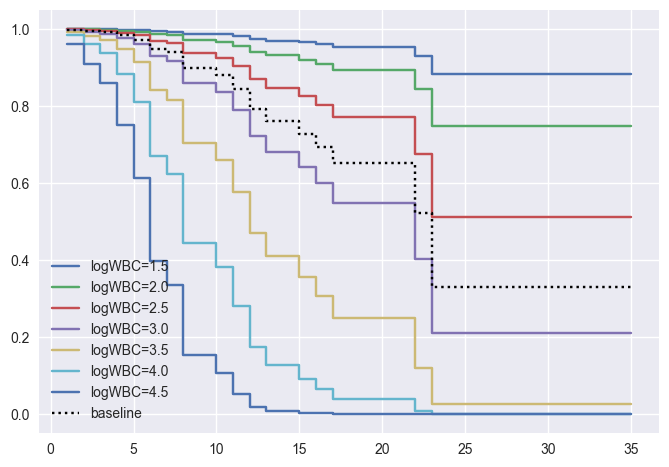

In [26]:
cph.plot_partial_effects_on_outcome(covariates='logWBC', values=subgrupos)

Podemos hacer lo mismo para la variable sexo

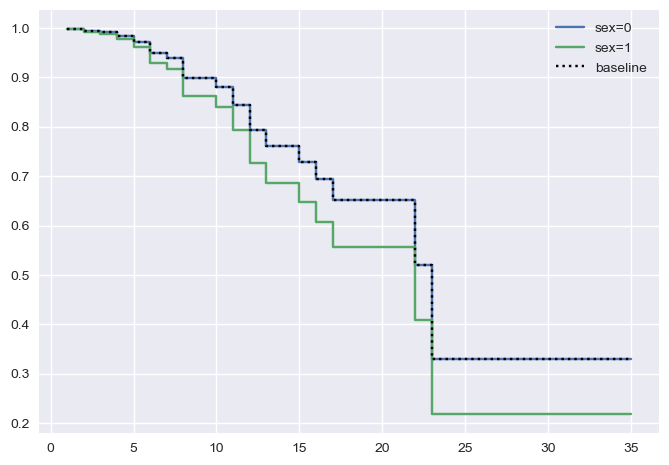

In [22]:
# categorical feature
cph.plot_covariate_groups(covariates='sex', values=[0,1]);

### Verificando suposición de proporcionalidad de riesgos para el modelo de Cox

In [27]:
cph.check_assumptions(leukemia)

Proportional hazard assumption looks okay.


[]

Ploteando intervalos de confianza

<Axes: xlabel='log(HR) (95% CI)'>

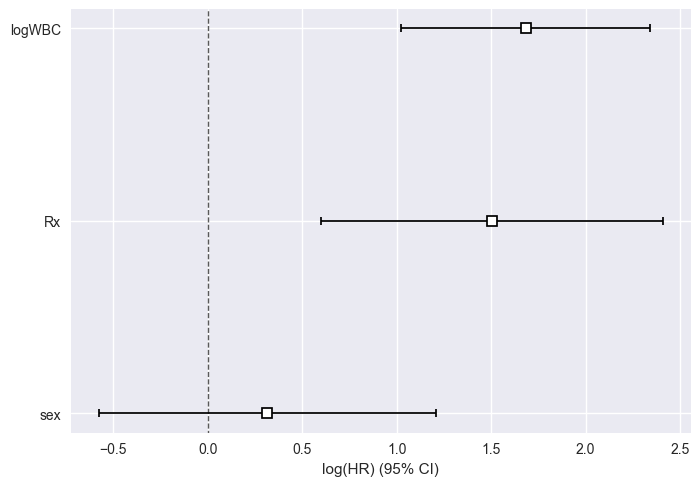

In [28]:
# We can see that the sex variable is not very useful by plotting the coefficients
cph.plot()

Consejo: con tan pocos valores únicos (solo 2), se puede intentar `strata=['sexo']` en la llamada en .fit.

### Estratificación en regresión de Cox

In [30]:
# Llamamos la clase para hacer la regresion de Cox
cph = lifelines.CoxPHFitter()

# Hacemos fit
# Recuerden que usa el dataframe entero de pandas y aclaramos cual es la columna de duración y de evento. 
cph.fit(df=leukemia, 
        duration_col='t', 
        event_col='status', 
        strata=['sex']) # Agregamos por que variables queremos estraficar

# Imprimimos un summary
cph.print_summary()
cph.baseline_cumulative_hazard_.shape

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'status'
                   strata = sex
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -55.73
         time fit was run = 2023-10-31 10:50:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
logWBC      1.45       4.28       0.34             0.78             2.13                 2.18                 8.40
Rx          1.00       2.71       0.47             0.07             1.93                 1.07                 6.86

            cmp to    z      p   -log2(p)
covariate                                
logWBC        0.00 4.22 <0.005      15.35
Rx            0.00 2.11   0.04       4.83
---
Concordance = 0.81
Partial AIC = 115.47
log-likelihood ratio test = 32.06 on 2 df
-log2(p) of ll-ratio test = 23.13

(24, 2)

La primera regresión de Cox, que incluye las 3 variables:

`Log-likelihood ratio test = 69.61 on 2 df, -log2(p)=50.21`

Esta regresión de Cox estratificando por `sex`:

`Log-likelihood ratio test = 47.19 on 3 df, -log2(p)=31.55`

`LRT` y `-log2(p)` son más altos en la primera regresión , lo que significa que probablemente sea un modelo más robusto. 

<Axes: xlabel='log(HR) (95% CI)'>

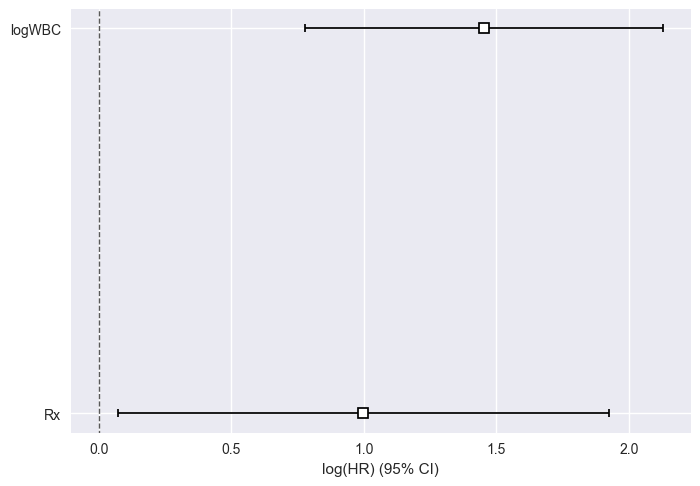

In [31]:
cph.plot()

### Analisis de residuos: ¿ajusta bien mi modelo? 

#### Residuos de Martingale
Los residuos de Martingale son útiles para evaluar el ajuste global del modelo y para investigar la forma funcional correcta de las covariables en tu modelo de riesgos proporcionales de Cox. Veamos cómo interpretarlos tanto gráficamente como en forma tabular.

##### Cómo verlo en un gráfico:
Eje X: valor pronosticado (o alguna transformación de él) 
Eje Y: el residuo de Martingale

*Dispersión alrededor de Cero*: Un buen modelo tendrá residuos de Martingale dispersos alrededor de cero a lo largo de los valores pronosticados. Si ves un patrón claro en la dispersión, como una curva, esto podría ser un indicativo de que la forma funcional de una de tus covariables no es adecuada. Es decir, deberiamos ver ruido blanco sin ningun patrón claro.

En una tabla de residuos de Martingale, cada fila corresponderá a una observación en tu conjunto de datos. Los valores individuales te informan cuánto se desvía la predicción del modelo para esa observación del evento observado. Valores cercanos a cero indican que el modelo ha hecho una buena predicción, mientras que valores alejados de cero sugieren lo contrario

In [48]:
r = cph.compute_residuals(leukemia, kind='martingale')
r.head()

/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/lifelines/utils/__init__.py:935: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


,t,status,martingale
34,5.0,True,0.782905
17,6.0,False,-0.092866
18,6.0,True,0.974532
20,6.0,True,0.895682
16,7.0,True,0.228084


<Axes: xlabel='t', ylabel='martingale'>

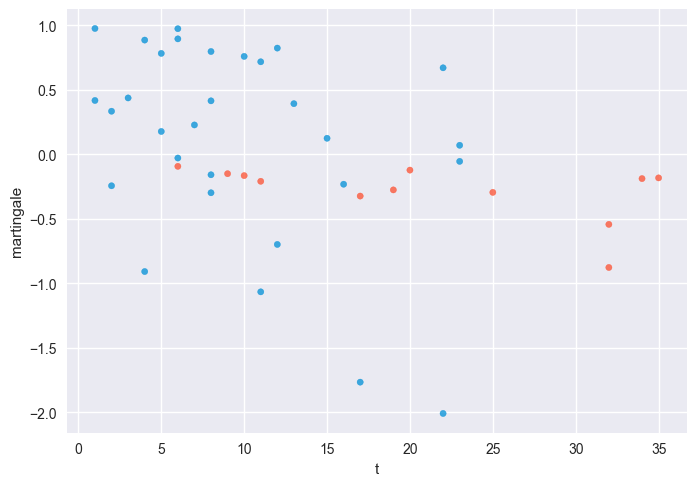

In [47]:
r.plot.scatter(
    x='t', # Eje de tiempo
    y='martingale', # Residuos
    c=np.where(r['status'] == True, '#008fd7', '#fc4f30'), #Establecemos colores, en rojo estan los pacientes que sobreviven. 
    alpha=0.75 # Transparencia de los puntos (estético)
)

#### Residuos de Deviance
Estos residuos son útiles para encontrar observaciones que son significativamente diferentes de lo que el modelo predice. Valores residuales de alta magnitud pueden indicar valores atípicos.

In [50]:
r = cph.compute_residuals(leukemia, kind='deviance')
r.head()

/Users/maico/miniconda3/envs/unl/lib/python3.9/site-packages/lifelines/utils/__init__.py:935: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


,t,status,deviance
34,5.0,True,1.220259
17,6.0,False,-0.430966
18,6.0,True,2.321990
20,6.0,True,1.652045
16,7.0,True,0.248176


<Axes: xlabel='t', ylabel='deviance'>

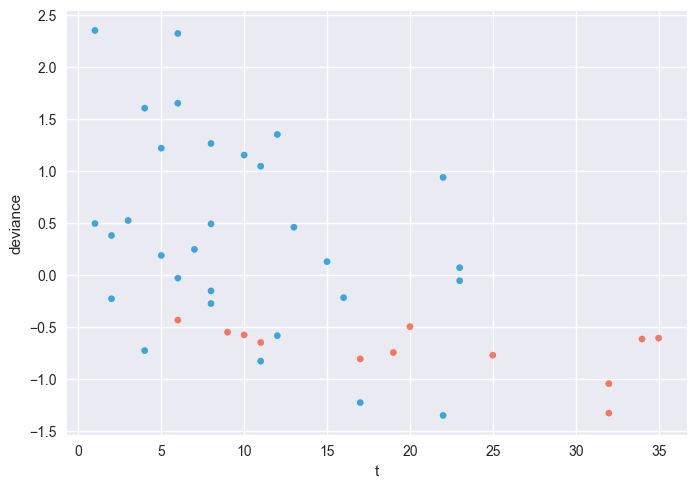

In [51]:
r.plot.scatter(
    x='t', # Eje de tiempo
    y='deviance', # Residuos
    c=np.where(r['status'] == True, '#008fd7', '#fc4f30'), #Establecemos colores, en rojo estan los pacientes que sobreviven. 
    alpha=0.75 # Transparencia de los puntos (estético)
)

### Suposición de Riesgos Proporcionales

Uno de los aspectos más cruciales a entender en el análisis de supervivencia, y en particular al usar el Modelo de Cox, es la `Suposición de Riesgos Proporcionales`. 

Analicemos cada término de este concepto:

- **Riesgo (Hazard)**: Es la probabilidad instantánea de experimentar el evento de interés (como la muerte, la recaída de una enfermedad, etc.), dado que se ha sobrevivido hasta un cierto punto en el tiempo.

- **Proporcional**: En este contexto, significa que la razón de los riesgos entre dos grupos se mantiene constante a lo largo del tiempo.

Entonces, si la suposición de riesgos proporcionales no se cumple, las estimaciones y conclusiones que obtengamos del Modelo de Cox podrían no ser válidas.
  
Bajo esta suposición, podemos hacer afirmaciones más robustas y comparables entre diferentes grupos en nuestro estudio, como por ejemplo, que `un tratamiento es efectivo independientemente del tiempo que pase`.

#### Cómo Verificarlo:

- **Residuos de Schoenfeld**: Estos residuos nos ayudan a evaluar gráfica y estadísticamente si la suposición se cumple para cada variable en el modelo.
  
- **Pruebas Formales**: Existen pruebas estadísticas específicas que nos permiten evaluar si se cumple esta suposición.

Con la libreria `lifelines` podemos hacerlo de forma sencilla y evaluar el valor de P. Tenemos que ver un valor de P > 0.05 para esa variable para que se cumpla la suposición de riesgos proporcionales. 

Volvemos a crear nuestro dataframe y regresión de Cox estratificada para refrescar la memoria

In [85]:
from lifelines.statistics import proportional_hazard_test

# Llamamos la clase para hacer la regresion de Cox
cph = lifelines.CoxPHFitter()

# Hacemos fit
# Recuerden que usa el dataframe entero de pandas y aclaramos cual es la columna de duración y de evento. 
cph.fit(df=leukemia, 
        duration_col='t', 
        event_col='status', 
        strata=['sex']) # Agregamos por que variables queremos estraficar

# Hacemos el test que verifica el supuesto de riesgos proporcionales
results = proportional_hazard_test(cph, leukemia, time_transform='km', robust=True)

# Imprimimos el resumen del test
results.print_summary(decimals=3)

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = km
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
            robust = True
         test_name = proportional_hazard_test

---
        test_statistic    p  -log2(p)
Rx                0.04 0.84      0.26
logWBC            0.17 0.68      0.56

### Graficando los residuos de Schoenfeld.
La libreria lifelines nos ofrece una forma automatica de validar nuestras variables aunque el output y gráficos son algo dificiles de interpretar. 

Si bien es mucho más complejo y excede los alcances de esta clase, lo importante es ver que la curva (la linea negra más gruesa) en los gráficos no tenga una pendiente clara ya que hablaria de que el efecto de esa variable cambiaría con el tiempo. 

Nos hace 2 gráficos por cada variable, ya que hace algunas transformaciones en la escala de tiempo para verificar que este supuesto de proporcionalidad se mantenga (por ejemplo, se podría mantener a nivel meses, y no años). 

Pueden consultar un poco la documentación de *Lifelines* [aquí](https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html)


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
         test_name = proportional_hazard_test

---
             test_statistic    p  -log2(p)
Rx     km              0.04 0.84      0.26
       rank            3.86 0.05      4.33
logWBC km              0.17 0.68      0.56
       rank            0.56 0.45      1.14



1. Variable 'Rx' failed the non-proportional test: p-value is 0.0496.

   Advice: with so few unique values (only 2), you can include `strata=['Rx', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<Axes: xlabel='rank-transformed time\n(p=0.4526)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6803)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0496)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8358)'>]]

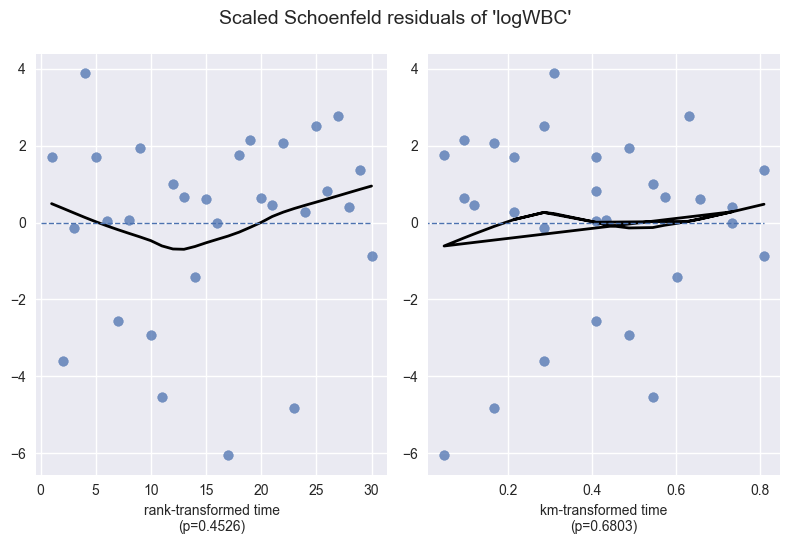

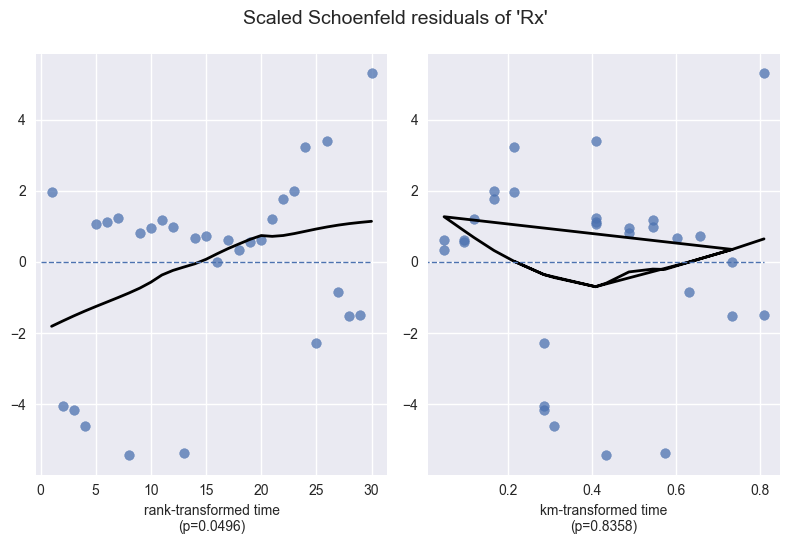

In [87]:
cph.check_assumptions(leukemia,
                    p_value_threshold=0.05, 
                    show_plots=True, 
                    advice=True, 
                    plot_n_bootstraps=False)

[¿Necesito preocuparme por la suposición de riesgo proporcional?](https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Do-I-need-to-care-about-the-proportional-hazard-assumption?)

Es un tema sensible y objeto de debate ya que:

- Si tu objetivo es la predicción de supervivencia, entonces no deberias por qué preocuparte por los riesgos proporcionales. Tu meta es maximizar algún puntaje, sin importar cómo se generen las predicciones.
- Dado un tamaño de muestra lo suficientemente grande, incluso las violaciones muy pequeñas a los riesgos proporcionales se manifestarán.

- Existen razones legítimas para asumir que todos los conjuntos de datos violarán la suposición de riesgo proporcional. Esto está bien detallado en "¿Por qué testear los riesgos proporcionales?" de Stensrud & Hernán [1].

- "Incluso si los riesgos no fueran proporcionales, modificar el modelo para ajustarse a un conjunto de suposiciones cambia fundamentalmente la pregunta científica. Como dijo Tukey: *'Es mejor una respuesta aproximada a la pregunta exacta que una respuesta exacta a la pregunta aproximada'*. Si ajustas el modelo de Cox en presencia de riesgos no proporcionales, ¿cuál es el efecto neto? Un poco menos de poder estadístico. [2].

La norma (todavía) es verificar los riesgos proporcionales. En todo caso, ante la violación de este supuesto (o el acto de omitir evaluarlo), hay que explicar porqué se está tomando esta conducta. 

Citas: 
- Stensrud MJ, Hernán MA. ¿Por qué testear los riesgos proporcionales? JAMA. Publicado en línea el 13 de marzo de 2020. doi:10.1001/jama.2020.1267
- AdamO (https://stats.stackexchange.com/users/8013/adamo), Verificando la suposición de riesgo proporcional, URL (versión: 2019-04-05): https://stats.stackexchange.com/q/400981

## Haciendo predicciones

<img src="https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/1698752740887.png"
style = "width:400px;">

In [89]:
leukemia['t'].describe()

count    42.000000
mean     12.880952
std       9.347498
min       1.000000
25%       6.000000
50%      10.500000
75%      18.500000
max      35.000000
Name: t, dtype: float64

En este caso, para cada "fila" (paciente a predecir), me genera el HR de supervivencia para cada "mes" de seguimiento

In [88]:
cph.predict_cumulative_hazard(leukemia[:5])

,0,1,2,3,4
1.0,0.001231,0.001268,0.003663,0.005919,0.001989
2.0,0.002998,0.003086,0.008919,0.014410,0.004844
3.0,0.005017,0.005165,0.014925,0.024114,0.008105
4.0,0.010236,0.010538,0.030452,0.049199,0.016537
5.0,0.015623,0.016084,0.046479,0.075091,0.025241
6.0,0.023143,0.023826,0.068850,0.111234,0.037390
7.0,0.023143,0.023826,0.068850,0.111234,0.037390
8.0,0.034436,0.035452,0.102447,0.165514,0.055635
9.0,0.034436,0.035452,0.102447,0.165514,0.055635
10.0,0.034436,0.035452,0.102447,0.165514,0.055635


In [70]:
# Solo tomamos los primeros 5 filas de pacientes (Esto seria como nuestro X_test!)

# Borramos status y tiempo (que seria nuestro y_test!)

valores_a_predecir = leukemia[:5].drop(['status', 't'], axis=1)

valores_a_predecir

,sex,logWBC,Rx
0,1,1.45,0
1,1,1.47,0
2,1,2.20,0
3,1,2.53,0
4,1,1.78,0


Haciendo predicciones de pacientes nuevos a partir de sus covariables. Hagamos de cuenta de que el paciente recién ingresa al estudio, es decir, no sabemos cuanto tiempo vivió. 

Más información [aquí](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.SemiParametricPHFitter.predict_survival_function)

Graficamos la supervivencia de estos 5 pacientes

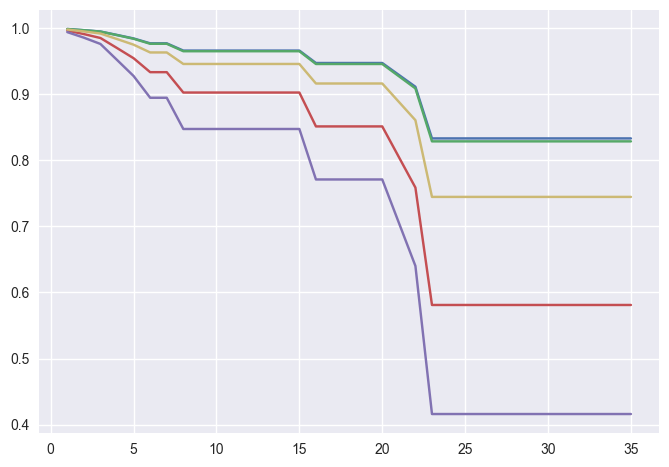

In [71]:
surv_func = cph.predict_survival_function(valores_a_predecir)

plt.plot(surv_func)

Aca podemos ver "exactamente" cuanto tiempo sobrevivirian estos pacientes

In [99]:
# Predecimos cuantos meses sobrevivirian estos 5 pacientes
exp_lifetime = cph.predict_expectation(valores_a_predecir)

exp_lifetime

0    31.141526
1    31.063377
2    26.570825
3    23.308516
4    29.577588
dtype: float64

In [100]:
leukemia[:5]

,t,status,sex,logWBC,Rx
0,35,0,1,1.45,0
1,34,0,1,1.47,0
2,32,0,1,2.20,0
3,32,0,1,2.53,0
4,25,0,1,1.78,0
